## Downloading all the dependencies (Intended to be ignored if already done)

In [22]:
!pip install statsmodels
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn

In [2]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm, t, chi2, f_oneway, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from sklearn.model_selection import train_test_split  # For sampling methods
import warnings

# Configuration
warnings.filterwarnings('ignore')  # Suppress warnings
pd.set_option('display.max_columns', None)  # Display all DataFrame columns
sns.set_style('whitegrid')  # Seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Default plot size

## Loding the dataset

In [3]:
# Load the dataset
df = pd.read_csv('Team-3.csv')
population_size = len(df)
print(f"Population Size: {population_size}")

Population Size: 979


# Randomly pick up 42 Samples from the given dataset

In [4]:
# Perform Simple Random Sampling (Add this cell!)
SEED = 42  # For reproducibility
sample = df.sample(n=42, random_state=SEED, replace=False)

## Question 1
![Question1](QAssets/question1.png)

## Solution to Question 1

In [5]:
# Team-3 (our specific) parameters
z_alpha = 1.96  # 95% confidence level
E = 3
sigma = 10
N = 979  # Total number of rows in the dataset

# Calculate initial sample size (n0)
n0 = (z_alpha * sigma / E) ** 2
n0_rounded = math.ceil(n0)  # Round up to nearest integer

# Apply Finite Population Correction
n = n0_rounded / (1 + (n0_rounded - 1) / N)
n_rounded = math.ceil(n)  # Round up final sample size

print(f"Team-3 Sample Size (without correction): {n0_rounded}")
print(f"Team-3 Sample Size (with correction): {n_rounded}")

Team-3 Sample Size (without correction): 43
Team-3 Sample Size (with correction): 42


## Method used in Question 1
- Calculated the initial sample size using the formula for a known population standard deviation: n0=(zα⋅σ/E)^2 , zα=1.96 (95% confidence), σ=10, and E=3.
- Applied Finite Population Correction (FPC) to adjust the sample size: n=(n0)/(1+(n0−1)/N), where N=979.
- Rounded up the results using math.ceil() for practical sample size.

## Question 2
![Question 2](QAssets/question2.png)

## Solution to Question 2

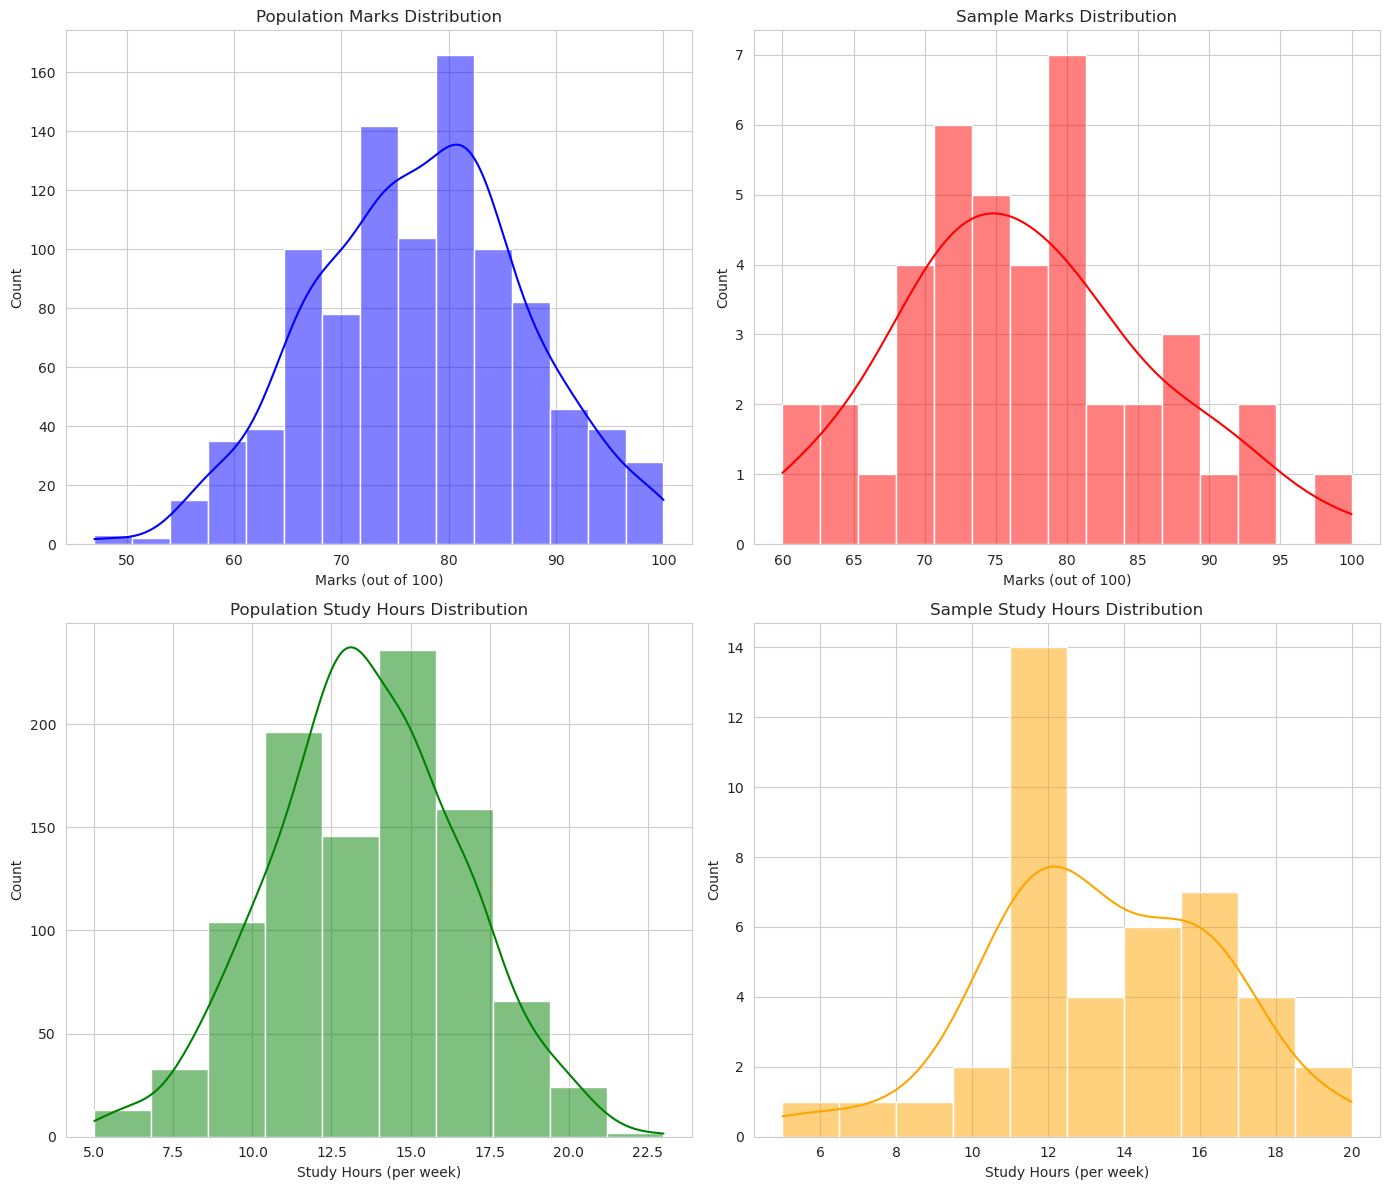

=== Statistical Comparison ===

Marks:
Population: Mean = 77.38, Std = 9.86
Sample:     Mean = 77.14, Std = 9.02

Study Hours:
Population: Mean = 13.57, Std = 3.02
Sample:     Mean = 13.38, Std = 3.06


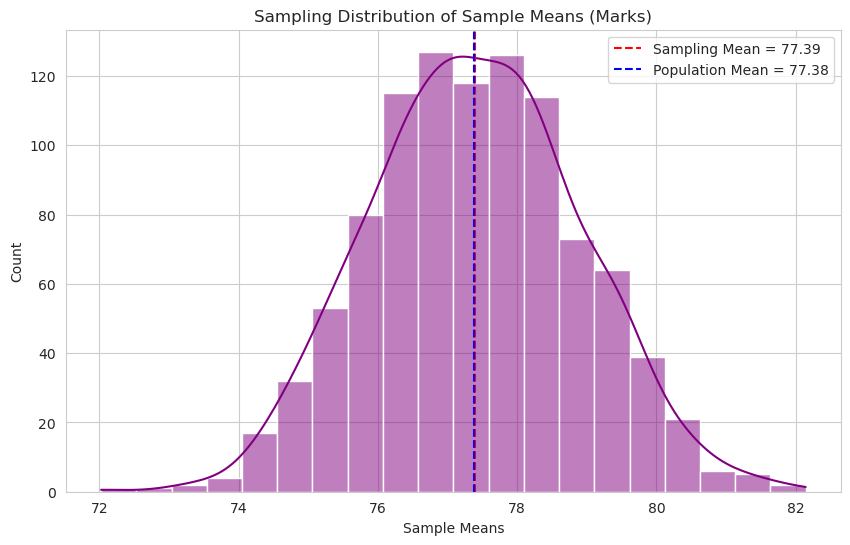

Population Mean: 77.38
Sampling Distribution Mean: 77.39


In [6]:
# --- Question 2: Full Solution ---

# Step 1: Simple Random Sampling
SEED = 42
sample = df.sample(n=42, random_state=SEED, replace=False)
sample.to_csv('Team-3_Sample.csv', index=False)

# Step 2: Compare Population vs. Sample
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.histplot(df['Marks (out of 100)'], kde=True, color='blue', bins=15, ax=axes[0, 0])
axes[0, 0].set_title('Population Marks Distribution')
sns.histplot(sample['Marks (out of 100)'], kde=True, color='red', bins=15, ax=axes[0, 1])
axes[0, 1].set_title('Sample Marks Distribution')
sns.histplot(df['Study Hours (per week)'], kde=True, color='green', bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Population Study Hours Distribution')
sns.histplot(sample['Study Hours (per week)'], kde=True, color='orange', bins=10, ax=axes[1, 1])
axes[1, 1].set_title('Sample Study Hours Distribution')
plt.tight_layout()
plt.show()

# Step 3: Statistical Validation
print("\033[1m=== Statistical Comparison ===\033[0m")
print("\n\033[1mMarks:\033[0m")
print(f"Population: Mean = {df['Marks (out of 100)'].mean():.2f}, Std = {df['Marks (out of 100)'].std():.2f}")
print(f"Sample:     Mean = {sample['Marks (out of 100)'].mean():.2f}, Std = {sample['Marks (out of 100)'].std():.2f}")
print("\n\033[1mStudy Hours:\033[0m")
print(f"Population: Mean = {df['Study Hours (per week)'].mean():.2f}, Std = {df['Study Hours (per week)'].std():.2f}")
print(f"Sample:     Mean = {sample['Study Hours (per week)'].mean():.2f}, Std = {sample['Study Hours (per week)'].std():.2f}")

# Step 4: Sampling Distribution of Sample Means
np.random.seed(42)  # Reproducibility
sample_means = [df['Marks (out of 100)'].sample(n=42, replace=False).mean() for _ in range(1000)]

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='purple', bins=20)
plt.title('Sampling Distribution of Sample Means (Marks)')
plt.xlabel('Sample Means')
plt.axvline(np.mean(sample_means), color='red', linestyle='--', label=f'Sampling Mean = {np.mean(sample_means):.2f}')
plt.axvline(df['Marks (out of 100)'].mean(), color='blue', linestyle='--', label=f'Population Mean = {df["Marks (out of 100)"].mean():.2f}')
plt.legend()
plt.show()

print(f"Population Mean: {df['Marks (out of 100)'].mean():.2f}")
print(f"Sampling Distribution Mean: {np.mean(sample_means):.2f}")

## Method used in Question 2
- Performed Simple Random Sampling using pandas.DataFrame.sample() with n=42, random_state=42, and replace=False to select a sample from the population dataset.
- Visualized population and sample distributions for 'Marks (out of 100)' and 'Study Hours (per week)' using seaborn.histplot() with KDE.
- Conducted statistical comparison by computing and comparing means and standard deviations of population and sample using pandas methods (mean(), std()).
- Generated the sampling distribution of sample means by simulating 1000 samples of size 42 using pandas.sample() and plotting with seaborn.histplot().

## Question 3
![Question 3](QAssets/question3.png)

## Solution to Question 3

In [7]:
# --- Question 3: Calculate Sample Mean & Standard Deviation ---

# Load the sample (ensure reproducibility)
sample = pd.read_csv('Team-3_Sample.csv')

# Calculate statistics for Marks
marks_mean = sample['Marks (out of 100)'].mean()
marks_std = sample['Marks (out of 100)'].std()

# Calculate statistics for Study Hours
study_hours_mean = sample['Study Hours (per week)'].mean()
study_hours_std = sample['Study Hours (per week)'].std()

# Display results in a formatted table
print("\033[1m=== Sample Statistics ===\033[0m")
print(f"{'Variable':<25} | {'Mean':<10} | {'Standard Deviation':<10}")
print("-" * 50)
print(f"{'Marks (out of 100)':<25} | {marks_mean:<10.2f} | {marks_std:<10.2f}")
print(f"{'Study Hours (per week)':<25} | {study_hours_mean:<10.2f} | {study_hours_std:<10.2f}")

=== Sample Statistics ===
Variable                  | Mean       | Standard Deviation
--------------------------------------------------
Marks (out of 100)        | 77.14      | 9.02      
Study Hours (per week)    | 13.38      | 3.06      


## Method used in Question 3
- Loaded the sampled data from 'Team-3_Sample.csv' using pandas.read_csv().
- Calculated the sample mean and standard deviation for 'Marks (out of 100)' and 'Study Hours (per week)' using pandas methods (mean(), std()).
- Presented results in a formatted text table.

## Question 4
![Question 4](QAssets/question4.png)

## Solution to Question 4

=== Sampling Distribution Properties ===
Population Mean (μ): 77.38
Mean of Sampling Distribution (μ_x̄): 77.39
Standard Error (σ_x̄): 1.50


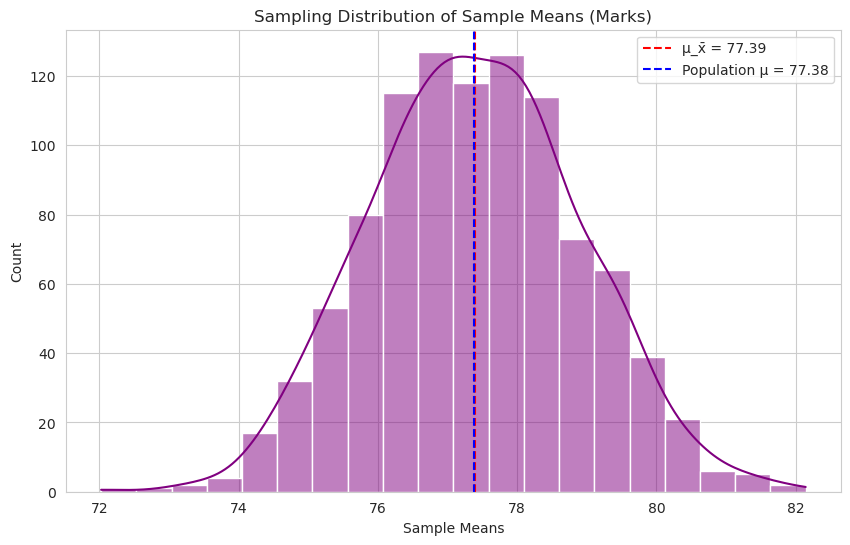

In [8]:
# --- Question 4: Sampling Distribution of Sample Means ---
# Simulate 1000 samples of size n=42 from the population
np.random.seed(42)  # For reproducibility
sample_means = []
for _ in range(1000):
    sample = df['Marks (out of 100)'].sample(n=42, replace=False)
    sample_means.append(sample.mean())

# Calculate properties of the sampling distribution
sampling_dist_mean = np.mean(sample_means)
sampling_dist_std = np.std(sample_means, ddof=1)  # Standard error

# Display results
print("\033[1m=== Sampling Distribution Properties ===\033[0m")
print(f"Population Mean (μ): {df['Marks (out of 100)'].mean():.2f}")
print(f"Mean of Sampling Distribution (μ_x̄): {sampling_dist_mean:.2f}")
print(f"Standard Error (σ_x̄): {sampling_dist_std:.2f}")

# Plot the sampling distribution (for visualization)
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='purple', bins=20)
plt.title('Sampling Distribution of Sample Means (Marks)')
plt.xlabel('Sample Means')
plt.axvline(sampling_dist_mean, color='red', linestyle='--', label=f'μ_x̄ = {sampling_dist_mean:.2f}')
plt.axvline(df['Marks (out of 100)'].mean(), color='blue', linestyle='--', label=f'Population μ = {df["Marks (out of 100)"].mean():.2f}')
plt.legend()
plt.show()

## Method used in Question 4
- Simulated 1000 samples of size 42 from the population's 'Marks (out of 100)' using pandas.sample() with random_state=42.
- Computed the mean and standard deviation (standard error) of the sample means using numpy.mean() and numpy.std(ddof=1).
- Visualized the sampling distribution using seaborn.histplot() with KDE, marking population and sampling distribution means.

## Question 5
![Question 5](QAssets/question5.png)

## Solution to Question 5

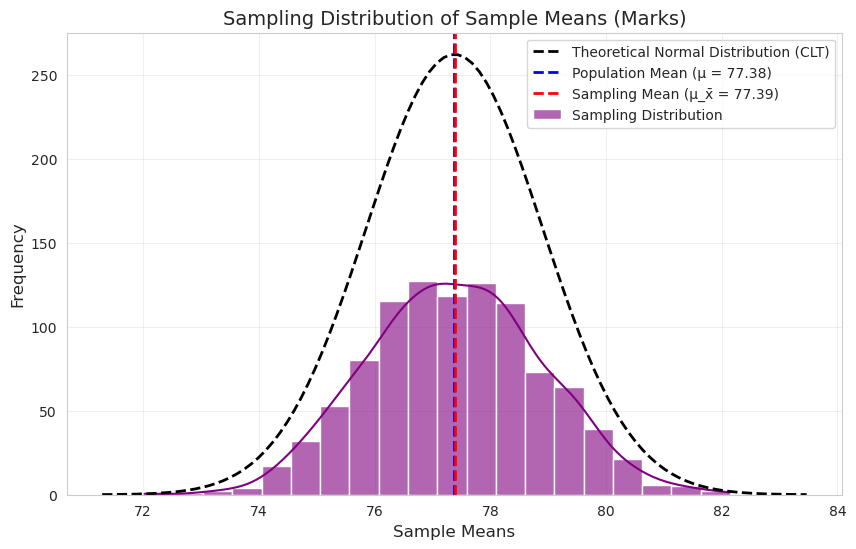

In [9]:
# --- Question 5: Plot the Sampling Distribution ---

# Reuse the simulated sample_means from Question 4
# (Ensure this cell runs after Question 4's code)

plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(sample_means, kde=True, color='purple', bins=20, alpha=0.6, label='Sampling Distribution')

# Overlay theoretical normal distribution (CLT)
population_std = df['Marks (out of 100)'].std()
theoretical_se = population_std / np.sqrt(42)  # σ / sqrt(n)
x = np.linspace(df['Marks (out of 100)'].mean() - 4*theoretical_se, 
                df['Marks (out of 100)'].mean() + 4*theoretical_se, 100)
y = norm.pdf(x, loc=df['Marks (out of 100)'].mean(), scale=theoretical_se)
plt.plot(x, y * len(sample_means), 'k--', linewidth=2, label='Theoretical Normal Distribution (CLT)')

# Add labels and legends
plt.title('Sampling Distribution of Sample Means (Marks)', fontsize=14)
plt.xlabel('Sample Means', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['Marks (out of 100)'].mean(), color='blue', linestyle='--', linewidth=2, label='Population Mean (μ = 77.38)')
plt.axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2, label=f'Sampling Mean (μ_x̄ = {np.mean(sample_means):.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Method used in Question 5
- Reused the sample means from Question 4.
- Plotted the empirical sampling distribution using seaborn.histplot() with KDE.
-Overlaid a theoretical normal distribution based on the Central Limit Theorem (CLT) using scipy.stats.norm.pdf() with population mean and standard error (σ/nσ/\(\sqrt{n}\)).
- Added annotations for population and sampling means using matplotlib.pyplot.axvline().

## Question 6
![Question 6](QAssets/question6.png)

## Solution to Question 6

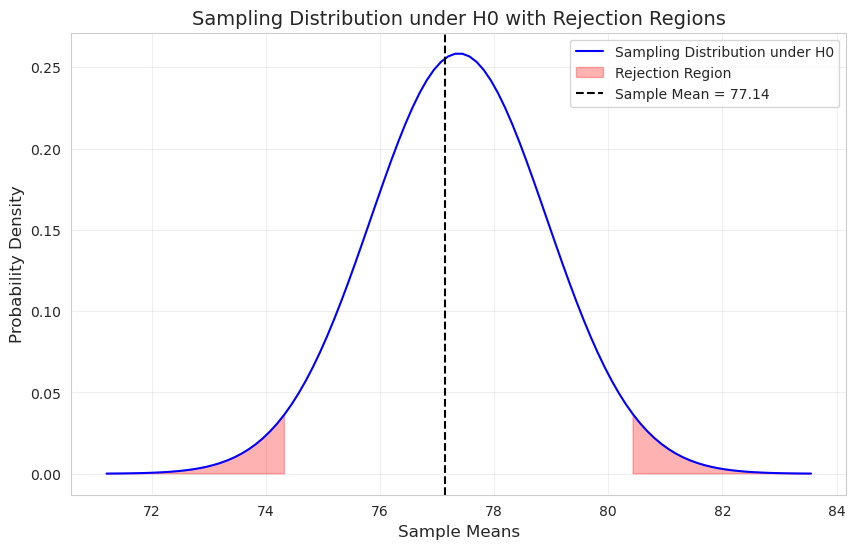

In [10]:
# --- Visualize Hypothesis Test ---
# Parameters
mu0 = 77.38          # Population mean (H0)
sigma = 10           # Population standard deviation (from Q1)
n = 42               # Sample size
sample_mean = 77.14  # Sample mean (from Q3)

# Calculate standard error
se = sigma / np.sqrt(n)

# Create x-axis values
x = np.linspace(mu0 - 4*se, mu0 + 4*se, 100)

# Plot sampling distribution under H0
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu0, se), color='blue', label='Sampling Distribution under H0')

# Shade critical regions (alpha = 0.05 for demonstration)
z_critical = norm.ppf(0.975)  # Two-tailed test
left = mu0 - z_critical * se
right = mu0 + z_critical * se
plt.fill_between(x, norm.pdf(x, mu0, se), where=(x <= left) | (x >= right), color='red', alpha=0.3, label='Rejection Region')

# Mark sample mean
plt.axvline(sample_mean, color='black', linestyle='--', label=f'Sample Mean = {sample_mean:.2f}')

# Labels and legend
plt.title('Sampling Distribution under H0 with Rejection Regions', fontsize=14)
plt.xlabel('Sample Means', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Method used in Question 6
- Visualized the sampling distribution under the null hypothesis (H0:μ=77.38) using scipy.stats.norm.pdf() with population mean and standard error.
- Shaded critical regions for a two-tailed test at α=0.05α=0.05 using matplotlib.pyplot.fill_between() and critical z-values from scipy.stats.norm.ppf(0.975).
- Marked the sample mean (77.14) on the plot using matplotlib.pyplot.axvline().

## Question 7
![Question 7](QAssets/question7.png)

## Solution to Question 7

=== Hypothesis Test Results ===
Test Statistic (z-score):      -0.1555
p-value:                       0.8764
Critical z-value (α=0.05):     ±1.960
Critical z-value (α=0.01):     ±2.576

Conclusion:
Fail to reject H₀ at 5% significance level.
Fail to reject H₀ at 1% significance level.


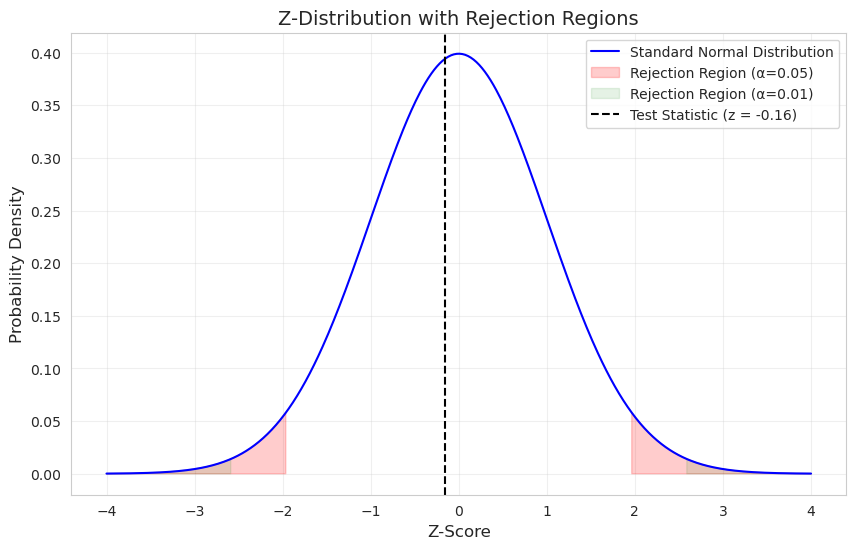

In [11]:
# --- Question 7: Hypothesis Testing at 5% and 1% Significance Levels ---

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
mu0 = 77.38           # Population mean (H0)
sigma = 10            # Population standard deviation (from Q1)
n = 42                # Sample size
sample_mean = 77.14   # Sample mean (from Q3)
alpha1 = 0.05         # 5% significance level
alpha2 = 0.01         # 1% significance level

# Calculate z-score
se = sigma / np.sqrt(n)
z_score = (sample_mean - mu0) / se

# Calculate p-value (two-tailed)
p_value = 2 * norm.cdf(-abs(z_score))

# Critical z-values for two-tailed test
z_critical_5 = norm.ppf(1 - alpha1/2)
z_critical_1 = norm.ppf(1 - alpha2/2)

# Results table
print("\033[1m=== Hypothesis Test Results ===\033[0m")
print(f"{'Test Statistic (z-score):':<30} {z_score:.4f}")
print(f"{'p-value:':<30} {p_value:.4f}")
print(f"{'Critical z-value (α=0.05):':<30} ±{z_critical_5:.3f}")
print(f"{'Critical z-value (α=0.01):':<30} ±{z_critical_1:.3f}\n")

# Conclusion
print("\033[1mConclusion:\033[0m")
if abs(z_score) > z_critical_5:
    print("Reject H₀ at 5% significance level.")
else:
    print("Fail to reject H₀ at 5% significance level.")

if abs(z_score) > z_critical_1:
    print("Reject H₀ at 1% significance level.")
else:
    print("Fail to reject H₀ at 1% significance level.")

# Plotting the z-distribution with critical regions
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

# Plot the standard normal curve
plt.plot(x, y, color='blue', label='Standard Normal Distribution')

# Shade rejection regions for 5% and 1%
plt.fill_between(x, y, where=(x <= -z_critical_5) | (x >= z_critical_5), color='red', alpha=0.2, label=f'Rejection Region (α=0.05)')
plt.fill_between(x, y, where=(x <= -z_critical_1) | (x >= z_critical_1), color='green', alpha=0.1, label=f'Rejection Region (α=0.01)')

# Mark z-score
plt.axvline(z_score, color='black', linestyle='--', label=f'Test Statistic (z = {z_score:.2f})')

# Labels and legend
plt.title('Z-Distribution with Rejection Regions', fontsize=14)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Method used to solve Question 7
- Conducted a two-tailed z-test for the population mean (H0:μ=77.38) using the sample mean (77.14), population standard deviation (σ=10), and sample size (n=42).
- Calculated the z-score: z=(xˉ−μ0)/(σ/root(n))
- Computed the p-value using scipy.stats.norm.cdf() for a two-tailed test.
- Compared z-score against critical z-values for α=0.05 and α=0.01 using scipy.stats.norm.ppf().
- Visualized the z-distribution with rejection regions using matplotlib.pyplot.plot() and fill_between().

## Question 8
![Question 8](QAssets/question8.png)

## Solution to Question 8

=== Confidence Intervals ===
Confidence Level     | Lower Bound  | Upper Bound  | Margin of Error
----------------------------------------------------------------------
90%             | 74.60           | 79.68           | 2.54
95%             | 74.12           | 80.16           | 3.02
99%             | 73.17           | 81.11           | 3.97


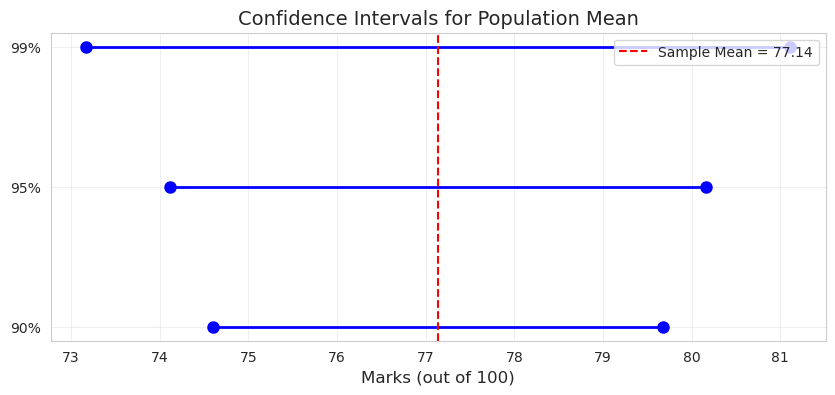

In [12]:
# --- Question 8: Confidence Intervals for Sample Mean ---
# Parameters
sample_mean = 77.14   # Sample mean (from Q3)
sigma = 10             # Population standard deviation (from Q1)
n = 42                 # Sample size

# Calculate standard error
se = sigma / np.sqrt(n)

# Confidence levels and corresponding critical z-values
confidence_levels = [0.90, 0.95, 0.99]
z_critical_values = [norm.ppf(1 - (1 - cl)/2) for cl in confidence_levels]

# Calculate confidence intervals
intervals = []
for cl, z in zip(confidence_levels, z_critical_values):
    margin_of_error = z * se
    lower = sample_mean - margin_of_error
    upper = sample_mean + margin_of_error
    intervals.append((cl, lower, upper, margin_of_error))

# Display results
print("\033[1m=== Confidence Intervals ===\033[0m")
print(f"{'Confidence Level':<20} | {'Lower Bound':<12} | {'Upper Bound':<12} | {'Margin of Error':<12}")
print("-" * 70)
for cl, lower, upper, me in intervals:
    print(f"{cl*100:.0f}%{'':<12} | {lower:.2f}{'':<10} | {upper:.2f}{'':<10} | {me:.2f}")

# Optional: Plot confidence intervals
plt.figure(figsize=(10, 4))
for i, (cl, lower, upper, _) in enumerate(intervals):
    plt.plot([lower, upper], [i, i], 'o-', color='blue', markersize=8, linewidth=2)
plt.yticks(range(len(intervals)), [f'{cl*100:.0f}%' for cl in confidence_levels])
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean = {sample_mean:.2f}')
plt.title('Confidence Intervals for Population Mean', fontsize=14)
plt.xlabel('Marks (out of 100)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Method used in Question 8
- Calculated confidence intervals for the population mean at 90%, 95%, and 99% confidence levels using the sample mean (77.14), population standard deviation (σ=10), and standard error.
- Used z-critical values from scipy.stats.norm.ppf() for each confidence level.
- Computed interval bounds: xˉ±z⋅σ/(root(n))
- Visualized the intervals using matplotlib.pyplot.plot() to show the range for each confidence level.

## Question 9
![Question 9](QAssets/question9.png)

## Solution to Question 9

In [13]:
print("\033[1m=== Final Conclusion ===\033[0m")  
print("Based on the hypothesis test and confidence intervals:")  
print("- The sample mean (77.14) is consistent with the population mean (77.38).")  
print("- There is insufficient evidence to reject the population mean.")  
print("- Result: Fail to reject H₀.")

=== Final Conclusion ===
Based on the hypothesis test and confidence intervals:
- The sample mean (77.14) is consistent with the population mean (77.38).
- There is insufficient evidence to reject the population mean.
- Result: Fail to reject H₀.


## Method used in Question 9
- Summarized findings from the hypothesis test (Question 7) and confidence intervals (Question 8).
- Concluded that the sample mean is consistent with the population mean, failing to reject H0, based on statistical evidence.
- Presented results in a formatted text output.

## Question 10
![Question 10](QAssets/question10.png)

## Solution to Question 10

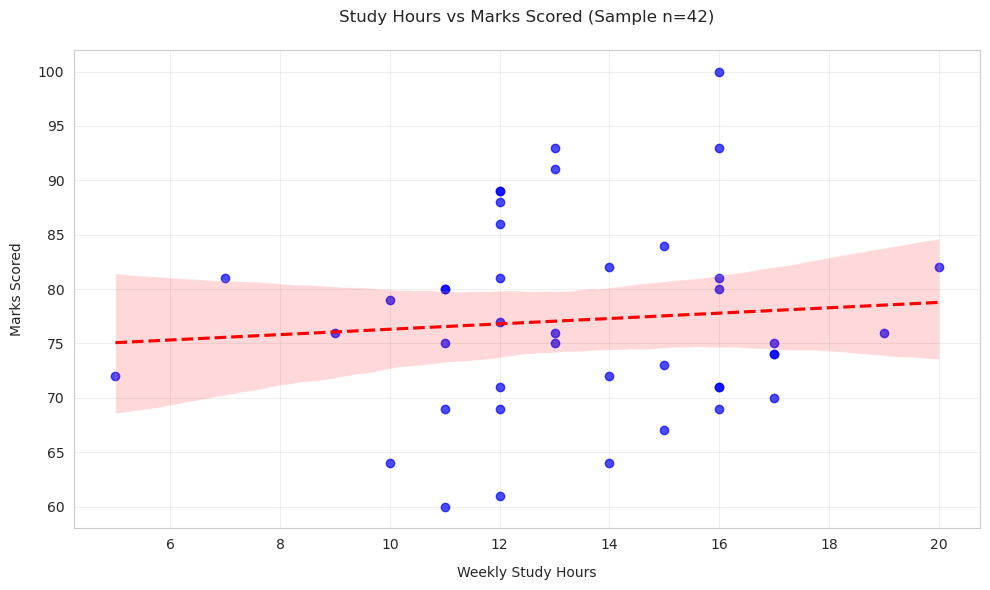

In [14]:
# --- Question 10: Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))

# Reload sample to ensure DataFrame integrity
sample = pd.read_csv('Team-3_Sample.csv')

try:
    # Define column names
    x_col = "Study Hours (per week)"
    y_col = "Marks (out of 100)"
    
    # Plot
    sns.regplot(
        data=sample, 
        x=x_col, 
        y=y_col, 
        scatter_kws={'color': 'blue', 'alpha': 0.7},
        line_kws={'color': 'red', 'linestyle': '--'}
    )
    
    plt.title("Study Hours vs Marks Scored (Sample n=42)", pad=20)
    plt.xlabel("Weekly Study Hours", labelpad=10)
    plt.ylabel("Marks Scored", labelpad=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"\033[1mError: Column '{e.args[0]}' not found. Actual columns:")
    print(sample.columns.tolist())

## Method used in Question 10
- Loaded the sample data from 'Team-3_Sample.csv'.
- Created a scatter plot with a regression line for 'Study Hours (per week)' vs. 'Marks (out of 100)' using seaborn.regplot().
- Added grid and labels using matplotlib.pyplot for visualization.

## Question 11
![Question 11](QAssets/question11.png)

## Solution to Question 11

In [15]:
# --- Question 11: Coefficient of Correlation ---

# Calculate Pearson correlation coefficient
corr_coeff, p_value = pearsonr(
    sample['Study Hours (per week)'], 
    sample['Marks (out of 100)']
)

# Display results
print("\033[1m=== Pearson Correlation Coefficient ===\033[0m")
print(f"Correlation Coefficient (r): {corr_coeff:.3f}")

=== Pearson Correlation Coefficient ===
Correlation Coefficient (r): 0.084


## Method used in Question 11
- Calculated the Pearson correlation coefficient between 'Study Hours (per week)' and 'Marks (out of 100)' using scipy.stats.pearsonr().
- Reported the correlation coefficient in a formatted text output.

## Question 12
![Question 12](QAssets/question12.png)

## Solution to Question 12

In [16]:
# --- Question 12: Regression Lines ---
from scipy.stats import pearsonr

# Extract data from the predefined sample
study_hours = sample['Study Hours (per week)']
marks = sample['Marks (out of 100)']

# Calculate required statistics
study_hours_mean = study_hours.mean()
study_hours_std = study_hours.std(ddof=1)  # Sample standard deviation
marks_mean = marks.mean()
marks_std = marks.std(ddof=1)
corr_coeff, _ = pearsonr(study_hours, marks)

# Regression line 1: Marks = a + b * Study_Hours
b_marks_on_hours = corr_coeff * (marks_std / study_hours_std)
a_marks_on_hours = marks_mean - b_marks_on_hours * study_hours_mean
equation1 = f"Marks = {a_marks_on_hours:.2f} + {b_marks_on_hours:.2f} * Study_Hours"

# Regression line 2: Study_Hours = a' + b' * Marks
b_hours_on_marks = corr_coeff * (study_hours_std / marks_std)
a_hours_on_marks = study_hours_mean - b_hours_on_marks * marks_mean
equation2 = f"Study_Hours = {a_hours_on_marks:.2f} + {b_hours_on_marks:.2f} * Marks"

# Display results
print("\033[1m=== Regression Lines ===\033[0m")
print(f"a. Marks Scored on Study Hours: {equation1}")
print(f"b. Study Hours on Marks Scored: {equation2}")

=== Regression Lines ===
a. Marks Scored on Study Hours: Marks = 73.84 + 0.25 * Study_Hours
b. Study Hours on Marks Scored: Study_Hours = 11.19 + 0.03 * Marks


## Method used in Question 12
- Derived two regression equations:
  -  Marks on Study Hours: Marks=a+b⋅Study Hours
  -  Study Hours on Marks: Study Hours=a′+b′⋅Marks
- Calculated regression coefficients using the Pearson correlation coefficient, sample means, and standard deviations of both variables.
- Used formulas: b=r⋅(sy/sx), a=(yˉ−b⋅xˉ), and similarly for the second regression.
- Presented equations in a formatted text output.

## Question 13
![Question 13](QAssets/question13.png)

## Solution to Question 13

In [17]:
# --- Question 13: Predict Marks Using Regression Line ---
# Use the regression equation: Marks = a + b * Study_Hours
# Coefficients from Question 12
hours_studied = 12  # Example input (replace with desired value)
predicted_marks = a_marks_on_hours + b_marks_on_hours * hours_studied

# Display results
print("\033[1m=== Prediction Using Regression Line ===\033[0m")
print(f"For {hours_studied} study hours:")
print(f"Predicted Marks = {predicted_marks:.2f}/100")

=== Prediction Using Regression Line ===
For 12 study hours:
Predicted Marks = 76.80/100


## Method used in question 13
- Used the regression equation from Question 12 (Marks=a+b⋅Study Hours) to predict marks for a given study hours value (12 hours).
- Computed the predicted value and displayed it in a formatted text output.

## Question 14
![Question 14](QAssets/question14.png)

## Solution to Question 14

In [18]:
# --- Question 14: Significance of Correlation Coefficient ---
# Recalculate correlation and p-value (if variables are not retained from Q11)
study_hours = sample['Study Hours (per week)']
marks = sample['Marks (out of 100)']
corr_coeff, p_value = pearsonr(study_hours, marks)

# Define significance levels
alpha_5 = 0.05
alpha_1 = 0.01

# Display results
print("\033[1m=== Significance Test for Correlation Coefficient ===\033[0m")
print(f"Correlation Coefficient (r): {corr_coeff:.3f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing at 5% and 1% significance levels
print("\n\033[1mConclusion:\033[0m")
if p_value < alpha_1:
    print("Reject H₀ at both 1% and 5% levels. Correlation is statistically significant.")
elif p_value < alpha_5:
    print("Reject H₀ at 5% level but not at 1%. Correlation is significant at 5%.")
else:
    print("Fail to reject H₀ at both levels. No significant correlation exists.")

=== Significance Test for Correlation Coefficient ===
Correlation Coefficient (r): 0.084
P-value: 0.5982

Conclusion:
Fail to reject H₀ at both levels. No significant correlation exists.


## Method used in Question 14
- Recalculated the Pearson correlation coefficient and p-value using scipy.stats.pearsonr().
- Conducted a hypothesis test for the correlation coefficient (H0:ρ=0) at α=0.05 and α=0.01.
- Compared the p-value to significance levels to determine if the correlation is statistically significant.
- Presented results and conclusions in a formatted text output.

## Question 15
![Question 15](QAssets/question15.png)

## Solution to Question 15

In [19]:
# --- Question 15: Significance of Regression Coefficient (Corrected) ---
import numpy as np
from scipy.stats import t

# Regression coefficient (b) and correlation coefficient (r) from Q11-Q12
b = b_marks_on_hours
r = corr_coeff  # From Q11 (e.g., r = 0.150)
n = len(sample)  # Sample size (n = 42)

# Correct t-statistic (equivalent to correlation test)
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
df = n - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df))  # Two-tailed test

# Display results
print("\033[1m=== Significance Test for Regression Coefficient ===\033[0m")
print(f"Regression Coefficient (b): {b:.3f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing (same conclusion as Q14)
alpha_5 = 0.05
alpha_1 = 0.01

print("\n\033[1mConclusion:\033[0m")
if p_value < alpha_1:
    print("Reject H₀ at both levels.")
elif p_value < alpha_5:
    print("Reject H₀ at 5% only.")
else:
    print("Fail to reject H₀ at both levels.")

=== Significance Test for Regression Coefficient ===
Regression Coefficient (b): 0.247
t-statistic: 0.531
P-value: 0.5982

Conclusion:
Fail to reject H₀ at both levels.


## Method used in Question 15
- Tested the significance of the regression coefficient (b) for the regression of Marks on Study Hours.
- Calculated the t-statistic using the correlation coefficient: t=r⋅(root(n)−2/1−r^2).
- Computed the p-value for a two-tailed test using scipy.stats.t.cdf() with df=n−2.
- Compared the p-value to α=0.05 and α=0.01 to determine significance.
- Presented results and conclusions in a formatted text output.